In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
for sample in ['A04091E1', 'B03903E6']:
    file_path = '/home/wpy/stereoseq/20240702-Exclusive/RNA/' + sample + '.guide.gem'
    guide_df = pd.read_csv(file_path, header=0, index_col=0, sep='\t', comment='#')
    guide_df = guide_df[guide_df['MIDCount'] > 0]

    duplicate_rows = guide_df[guide_df.duplicated(subset=['x', 'y'], keep=False)]
    single_df = guide_df.drop_duplicates(subset=['x', 'y'])

    dedup_df = duplicate_rows.groupby(['x', 'y'])[['geneID', 'MIDCount']].max().reset_index()
    dedup_df['ExonCount'] = dedup_df['MIDCount']

    out_df = pd.concat([single_df, dedup_df], axis=0)
    out_df.reset_index(inplace=True, drop=True)

    out_df['MIDCount'] = 1
    out_df['ExonCount'] = 1

    out_path = file_path.split('.gem')[0] + '.filter.gem'
    out_df.to_csv(out_path, index=False, header=True, sep='\t')
    print(sample, out_df.head(20))

A04091E1        geneID      x      y  MIDCount  ExonCount
0     sgJun_2  12606  12084         1          1
1     sgJun_2  14003  11764         1          1
2     sgJun_2  13390  10000         1          1
3     sgJun_2  10259  14532         1          1
4     sgJun_2   9975  13845         1          1
5     sgJun_2  12629  11498         1          1
6     sgJun_2  13472  13242         1          1
7     sgJun_2  12763  11080         1          1
8     sgJun_2  12407  11156         1          1
9   sgAckr3_2  12460  10240         1          1
10  sgAckr3_2  14187  11654         1          1
11  sgAckr3_2  11695  15175         1          1
12  sgAckr3_2  10902   6606         1          1
13  sgAckr3_2   9210  15068         1          1
14  sgAckr3_2  10454   7842         1          1
15  sgAckr3_2   7277  12120         1          1
16  sgAckr3_2   9636  14202         1          1
17  sgAckr3_2  10633  13095         1          1
18  sgAckr3_2  14423  10757         1          1
19  sgAckr3

In [261]:
file_path = '/home/wpy/stereoseq/in_vivo_tumor/B304-8-merge/out/B304-8-merge/04.output/A02883C3.gem'
df = pd.read_csv(file_path, header=0, index_col=0, sep='\t', comment='#')

In [263]:
dup = df[df.duplicated(subset=['x', 'y'], keep=False)]
dup

,geneID,x,y,MIDCount,ExonCount
1,sgJun_2,14003,11764,1,1
2,sgJun_2,13390,10000,1,1
5,sgJun_2,10259,14532,1,1
6,sgJun_2,9975,13845,1,1
7,sgJun_2,12629,11498,2,2
...,...,...,...,...,...
14564,sgKlf2_2,11589,14532,1,1
14565,sgKlf2_2,5717,13068,1,1
14568,sgKlf2_2,13795,13657,2,2
14570,sgKlf2_2,12201,12765,1,1


In [264]:
plot_df = dup.groupby(['x', 'y']).count().reset_index()

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.scat

/tmp/ipykernel_21736/2116462386.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(out_df, x='y', y='x', palette='RdBu_r')


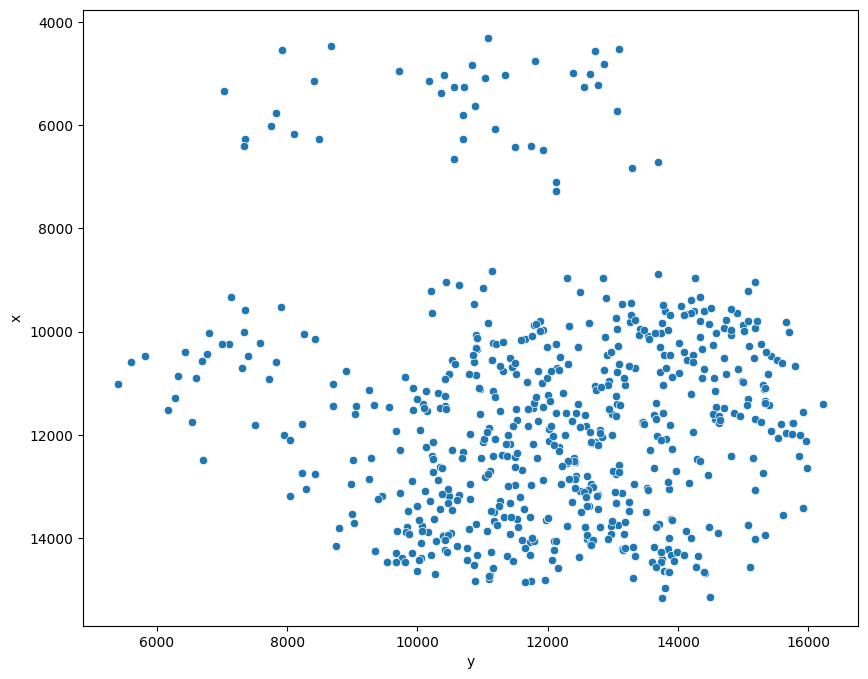

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(out_df, x='y', y='x', palette='RdBu_r')
plt.gca().invert_yaxis()

ps -ef | grep wpy

In [274]:
single_df = df.drop_duplicates(subset=['x', 'y'])

/tmp/ipykernel_42556/3903037992.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(single_df, x='y', y='x', palette='RdBu_r')
/tmp/ipykernel_42556/3903037992.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(plot_df, x='y', y='x', palette='RdBu_r', color='orange')


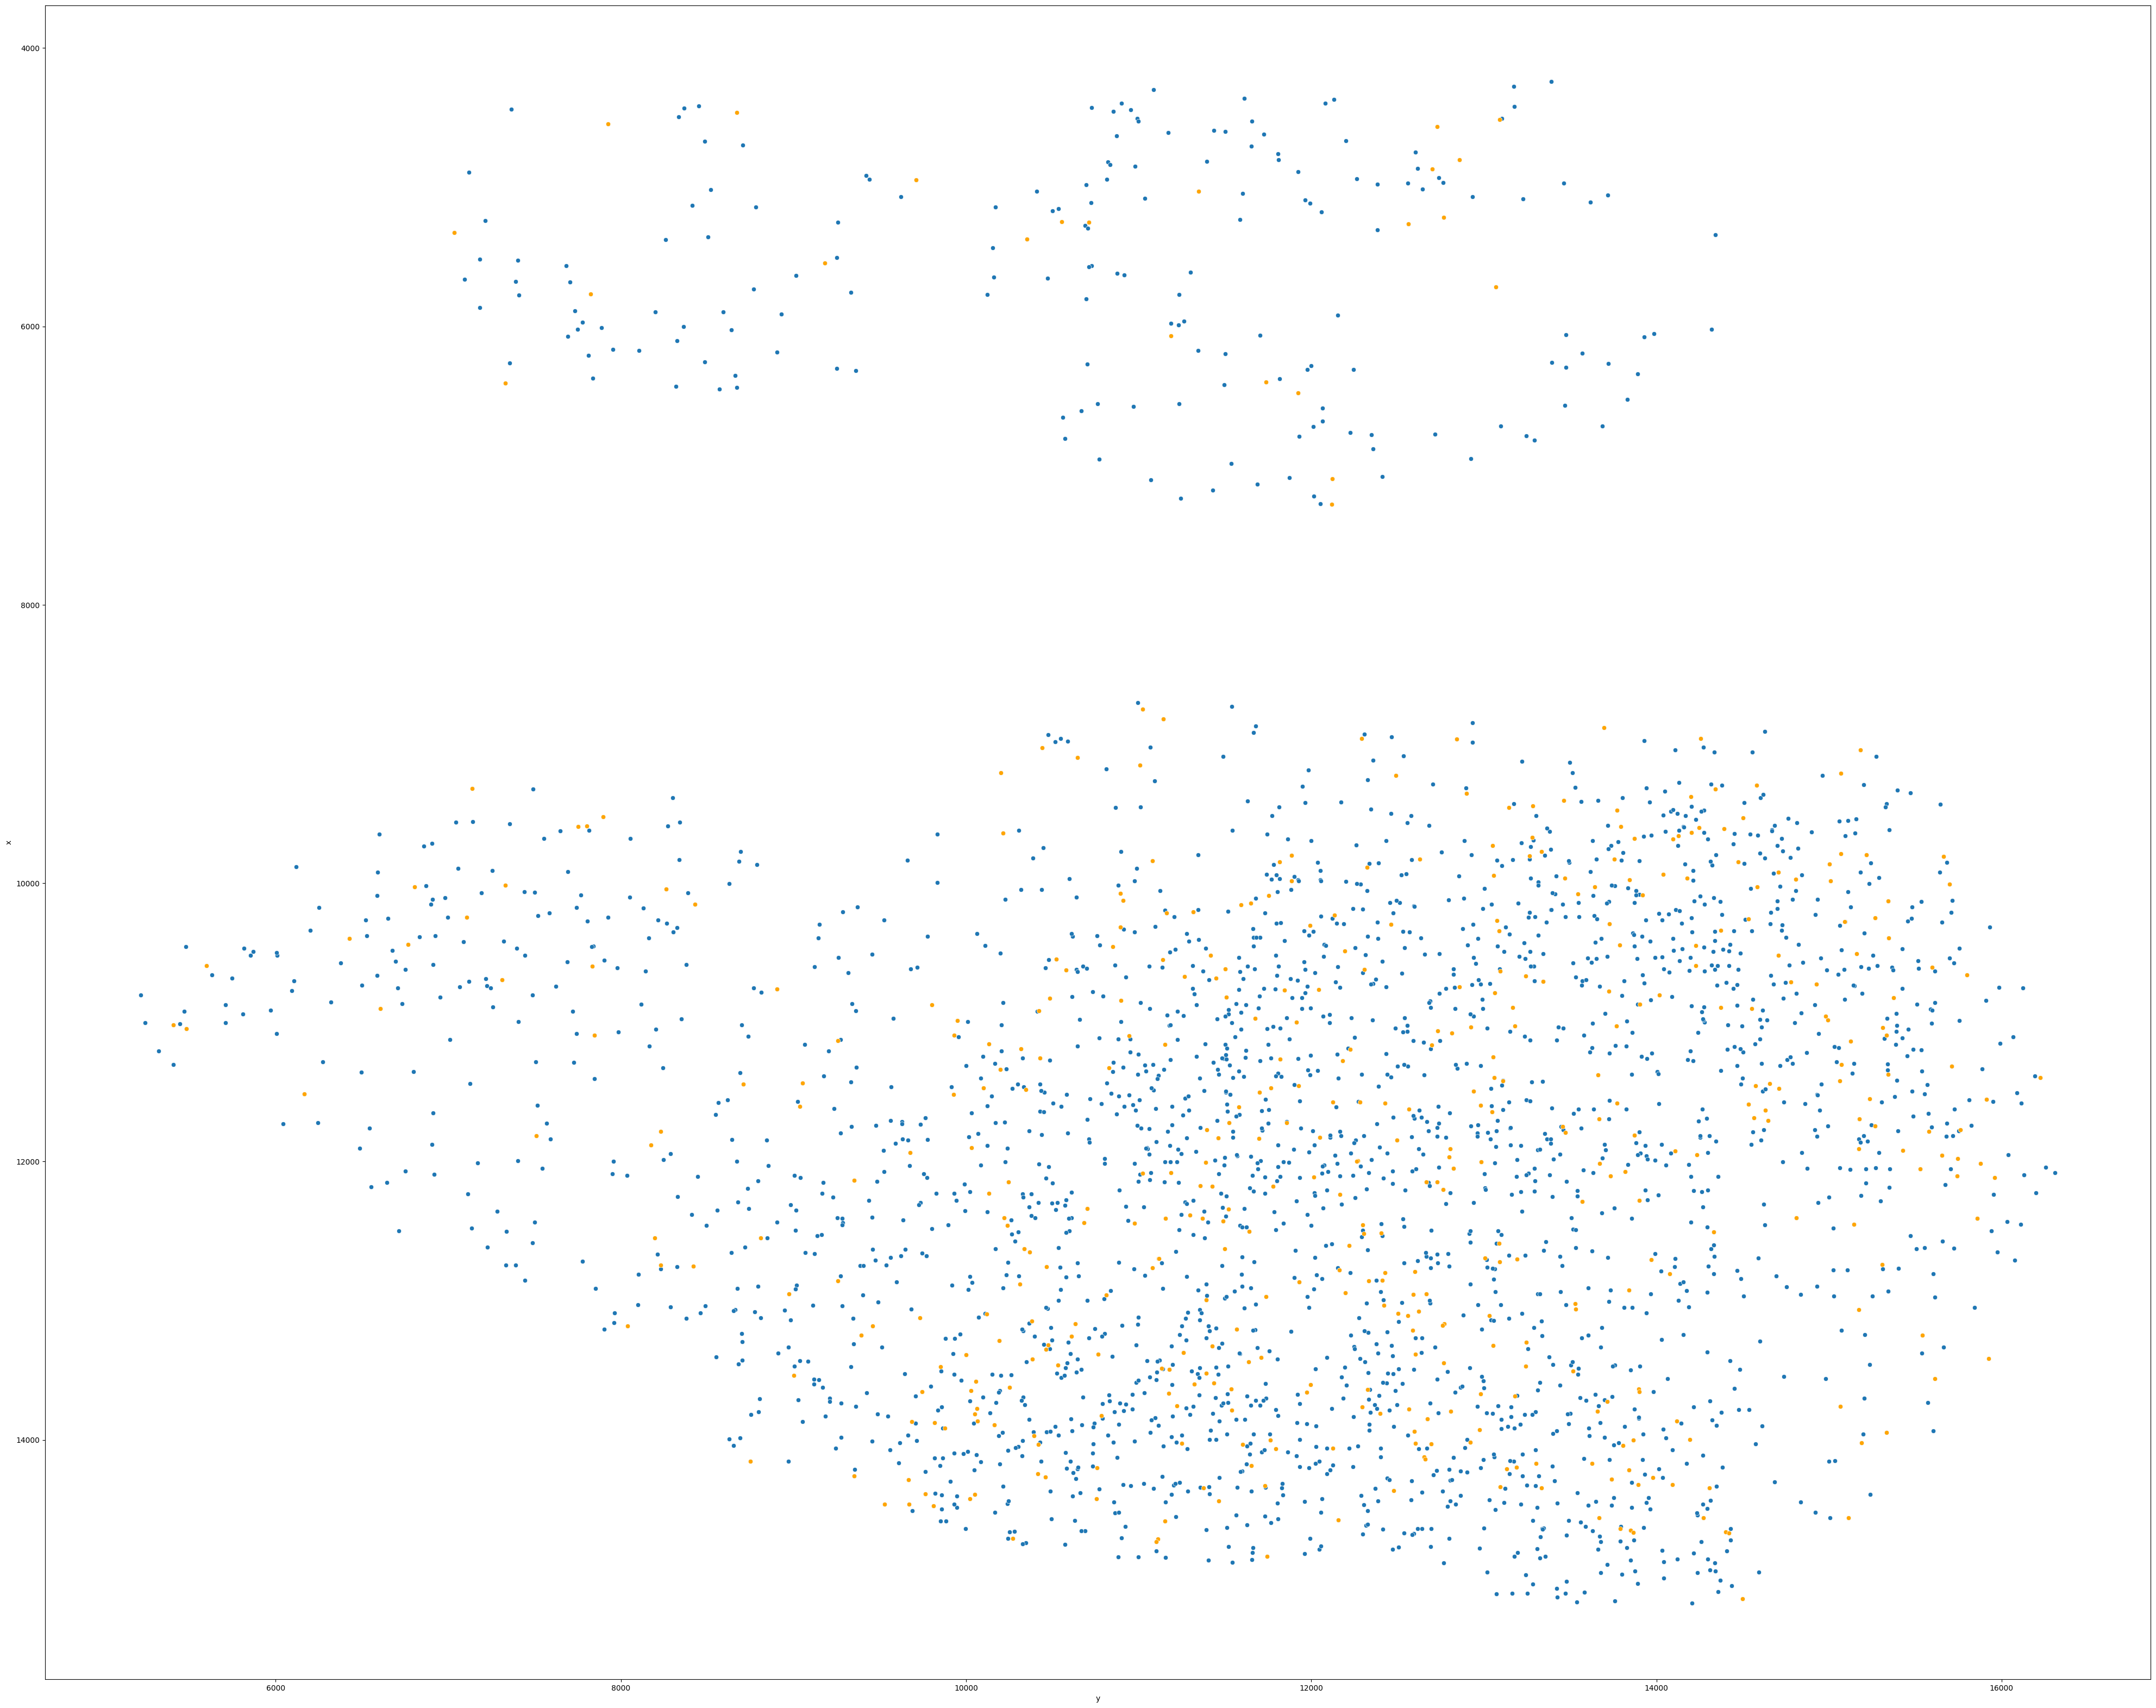

In [277]:
plt.figure(figsize=(50, 40))
sns.scatterplot(single_df, x='y', y='x', palette='RdBu_r')
sns.scatterplot(plot_df, x='y', y='x', palette='RdBu_r', color='orange')
plt.gca().invert_yaxis()

In [151]:
# sns.barplot(df.groupby('geneID')['MIDCount'].sum().sort_values())
# plt.title('Count of guides')
# plt.xticks(rotation=90)
# plt.show()

In [152]:
# sns.barplot(df.groupby('geneID')['MIDCount'].count().sort_values())
# plt.title('Count of bins')
# plt.xticks(rotation=90)
# plt.show()

In [153]:
# sns.kdeplot(df[df.geneID == 'sgNTC'], x='MIDCount', log_scale=False)
# # sns.kdeplot(df, x='MIDCount', log_scale=False)
# plt.gca().set_yscale('log')
# plt.ylim(1e-10, 1)

In [154]:
# sns.barplot(single_df.groupby('geneID')['MIDCount'].sum().sort_values())
# plt.title('Count of guides')
# plt.xticks(rotation=90)
# plt.show()

In [155]:
duplicate_rows = df[df.duplicated(subset=['x', 'y'], keep=False)]
duplicate_rows

,geneID,x,y,MIDCount,ExonCount
0,sgAdrb2_1_gene,845,11357,1,1
2,sgAdrb2_1_gene,883,8869,2,2
3,sgAdrb2_1_gene,918,11349,2,2
6,sgAdrb2_1_gene,939,10076,1,1
7,sgAdrb2_1_gene,952,8352,1,1
...,...,...,...,...,...
387782,sgnon-targeting_2_gene,10136,8096,1,1
387786,sgnon-targeting_2_gene,10147,8059,1,1
387822,sgnon-targeting_2_gene,10197,6755,7,7
387835,sgnon-targeting_2_gene,10213,8820,1,1


In [156]:
single_df = df.drop_duplicates(subset=['x', 'y'])

In [157]:
dedup_df = duplicate_rows.groupby(['x', 'y'])[['geneID', 'MIDCount']].max().reset_index()
dedup_df['ExonCount'] = dedup_df['MIDCount']

In [158]:
out_df = pd.concat([single_df, dedup_df], axis=0)
out_df.reset_index(inplace=True, drop=True)

In [159]:
out_df

,geneID,x,y,MIDCount,ExonCount
0,sgAdrb2_1_gene,845,11357,1,1
1,sgAdrb2_1_gene,875,7435,1,1
2,sgAdrb2_1_gene,883,8869,2,2
3,sgAdrb2_1_gene,918,11349,2,2
4,sgAdrb2_1_gene,931,8916,4,4
...,...,...,...,...,...
190654,sgnon-targeting_2_gene,10270,6478,2,2
190655,sgZc3h12a_1_gene,10277,6598,2,2
190656,sgZc3h12a_1_gene,10281,6737,2,2
190657,sgZc3h12a_1_gene,10286,6294,2,2


In [160]:
out_df.MIDCount = 1
out_df.ExonCount = 1

In [161]:
out_path = file_path.split('.gem')[0] + '.filter.gem'
out_df.to_csv(out_path, index=False, header=True, sep='\t')

In [4]:
# for sample in ['B926/D03658A5', 'B926/D03658A6', 'B922/C03628E2', 'B922/D03658A1', 'B924/C03628A1', 'B924/D03658A3']:
for sample in ['A04091E1', 'B03903E6']:
    path = '/home/wpy/stereoseq/20240702-Exclusive/RNA/' + sample
    tissue_df = pd.read_csv(path + '.tissue.gem', header=0, index_col=None, sep='\t', comment='#')
    guide_df = pd.read_csv(path + '.guide.filter.gem', header=0, index_col=None, sep='\t', comment='#')
    df = pd.concat([tissue_df, guide_df])
    df.to_csv(path + '.combine.filtered.gem', index=False, header=True, sep='\t')
    print(sample)

A04091E1
B03903E6


In [2]:
import scanpy as sc
from bin import load_bgi

In [7]:
# samples = ['B926/D03658A5', 'B926/D03658A6', 'B922/C03628E2', 'B922/D03658A1', 'B924/C03628A1', 'B924/D03658A3']
samples = ['A04091E1', 'B03903E6']
adata_list = {}
bin_size = 20
for sample in samples:
    path = '/home/wpy/stereoseq/20240702-Exclusive/RNA/' + sample
    print(sample)
    adata_list[sample] = load_bgi.load_bin(path + '.combine.filtered.gem', bin_size=bin_size, library_id='spatial')
    print(sample + ' Done')
for idx, sample in enumerate(samples):
    # adata_list[sample].obs['marker'] = sample.split('/')[0] + '-' + str(2 - idx % 2)
    adata_list[sample].obs['marker'] = sample[0]
cdata = sc.concat(adata_list, join='outer')
cdata.obs_names_make_unique()
gdata = cdata[:, cdata.var_names.str.startswith('sg')].copy()
# gdata[:, 'sgNTC'].X = gdata[:, ['sgNTC', 'sgnon-targeting_1_gene', 'sgnon-targeting_2_gene']].X.toarray().sum(axis=1)

# gdata = gdata[:, ~gdata.var_names.str.startswith('sgnon')].copy()
gdata.var_names = gdata.var_names.str.replace('sgNon', 'sgnon')
gdata.write_h5ad(f'./RNA/spatial.filtered.guide.bin{bin_size}.h5')

A04091E1
A04091E1 Done
B03903E6
B03903E6 Done


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
for idx, sample in enumerate(samples):
    # adata_list[sample].obs['marker'] = sample.split('/')[0] + '-' + str(2 - idx % 2)
    adata_list[sample].obs['marker'] = sample[0]

In [22]:
cdata = sc.concat(adata_list, join='outer')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
cdata.obs_names_make_unique()

In [24]:
cdata.obs_names

Index(['4980', '7470', '11351', '10460', '2664', '6061', '7424', '1664',
       '1777', '7653',
       ...
       '2976', '5804', '6210-1', '2808', '7735-1', '135', '4586-1', '4091-1',
       '3864-1', '7218-1'],
      dtype='object', length=11622)

In [28]:
gdata = cdata[:, cdata.var_names.str.startswith('sg')].copy()

In [31]:
gdata.var_names

Index(['sgAckr3_1', 'sgAckr3_2', 'sgBatf_1', 'sgBatf_2', 'sgBcl2_1',
       'sgBcl2_2', 'sgBcl2l11_1', 'sgBhlhe40_1', 'sgBhlhe40_2', 'sgCcr10_1',
       'sgCcr10_2', 'sgCcr1_1', 'sgCcr1_2', 'sgCcr2_1', 'sgCcr4_1', 'sgCcr5_1',
       'sgCcr5_2', 'sgCcr6_1', 'sgCcr6_2', 'sgCcr7_1', 'sgCcr7_2', 'sgCd74_1',
       'sgCd74_2', 'sgCxcr1_1', 'sgCxcr1_2', 'sgCxcr2_1', 'sgCxcr3_1',
       'sgCxcr3_2', 'sgCxcr4_2', 'sgCxcr5_1', 'sgCxcr5_2', 'sgCxcr6_1',
       'sgDdit4_1', 'sgDdit4_2', 'sgElob_1', 'sgElob_2', 'sgFos_1',
       'sgFoxp1_1', 'sgGpr35_1', 'sgGpr35_2', 'sgHopx_1', 'sgHopx_2',
       'sgJun_1', 'sgJun_2', 'sgJund_1', 'sgJund_2', 'sgKlf2_1', 'sgKlf2_2',
       'sgNon-targeting_1', 'sgNon-targeting_2', 'sgNon-targeting_3',
       'sgNon-targeting_4', 'sgNon-targeting_5', 'sgNon-targeting_6',
       'sgTgif1_1', 'sgTgif1_2', 'sgTox_2', 'sgYbx1_1', 'sgYbx1_2'],
      dtype='object')

In [23]:
gdata[:, 'sgNTC'].X = gdata[:, ['sgNTC', 'sgnon-targeting_1_gene', 'sgnon-targeting_2_gene']].X.toarray().sum(axis=1)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [13]:
gdata[:, 'sgnon-targeting_1_gene'].X.sum()

4956

In [14]:
gdata[:, 'sgnon-targeting_2_gene'].X.sum()

43745

In [15]:
gdata[:, 'sgNTC'].X.sum()

48897

In [24]:
gdata = gdata[:, ~gdata.var_names.str.startswith('sgnon')].copy()

In [32]:
gdata.var_names = gdata.var_names.str.replace('sgNon', 'sgnon')

In [33]:
# fdata = cdata[:, ~cdata.var_names.str.startswith('sg')].copy()

gdata.write_h5ad('./RNA/spatial.filtered.guide.h5')
# fdata.write_h5ad('./RNA/spatial.filtered.tissue.h5')

In [3]:
from bin import load_bgi
samples = ['B926/D03658A5', 'B926/D03658A6', 'B922/C03628E2', 'B922/D03658A1', 'B924/C03628A1', 'B924/D03658A3']
adata_list = {}
for sample in samples:
    path = '/home/wpy/stereoseq/20240502-SPACseq/gRNA/' + sample
    print(sample)
    adata_list[sample] = load_bgi.load_bin(path + '.combine.filtered.gem', bin_size=20, library_id='spatial')

B926/D03658A5
B926/D03658A6
B922/C03628E2
B922/D03658A1
B924/C03628A1
B924/D03658A3


In [4]:
for idx, sample in enumerate(samples):
    adata_list[sample].obs['marker'] = sample.split('/')[0] + '-' + str(2 - idx % 2)
cdata = sc.concat(adata_list, join='outer')
cdata.obs_names_make_unique()
gdata = cdata[:, cdata.var_names.str.startswith('sg')].copy()
gdata[:, 'sgNTC'].X = gdata[:, ['sgNTC', 'sgnon-targeting_1_gene', 'sgnon-targeting_2_gene']].X.toarray().sum(axis=1)
gdata = gdata[:, ~gdata.var_names.str.startswith('sgnon')].copy()
gdata.var_names = gdata.var_names.str.replace('sgNTC', 'sgnon-targeting')
gdata.write_h5ad('../20240502-SPACseq/RNA/Multitime.filtered.guide.bin20.h5')

NameError: name 'sc' is not defined